<h3>Time Series Analysis On Weekly Data<h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
df['arrival_date_week_number'].value_counts()

33    3580
30    3087
32    3045
34    3040
18    2926
21    2854
28    2853
17    2805
20    2785
29    2763
42    2756
31    2741
41    2699
15    2689
27    2664
25    2663
38    2661
23    2621
35    2593
39    2581
22    2546
24    2498
13    2416
16    2405
19    2402
40    2397
26    2391
43    2352
44    2272
14    2264
37    2229
8     2216
36    2167
10    2149
9     2117
7     2109
12    2083
11    2070
45    1941
53    1816
49    1782
47    1685
46    1574
6     1508
50    1505
48    1504
4     1487
5     1387
3     1319
2     1218
52    1195
1     1047
51     933
Name: arrival_date_week_number, dtype: int64

In [4]:
df['arrival_date_day_of_month'].value_counts()

17    4406
5     4317
15    4196
25    4160
26    4147
9     4096
12    4087
16    4078
2     4055
19    4052
20    4032
18    4002
24    3993
28    3946
8     3921
3     3855
30    3853
6     3833
14    3819
27    3802
21    3767
4     3763
13    3745
7     3665
1     3626
23    3616
11    3599
22    3596
29    3580
10    3575
31    2208
Name: arrival_date_day_of_month, dtype: int64

In [5]:
dfr = df[df['hotel']=='Resort Hotel']

In [6]:
dfr.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
sortedval=dfr.sort_values(['arrival_date_year','arrival_date_week_number'], ascending=True)
sortdf=pd.DataFrame(sortedval)
sortdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [8]:
reqcol = pd.DataFrame(sortdf, columns= ['arrival_date_year','arrival_date_week_number','is_canceled'])

In [9]:
reqcol.head()

,arrival_date_year,arrival_date_week_number,is_canceled
0,2015,27,0
1,2015,27,0
2,2015,27,0
3,2015,27,0
4,2015,27,0


In [10]:
reqcol['mergedweek'] = reqcol['arrival_date_year'].map(str) + reqcol['arrival_date_week_number'].map(str)

In [11]:
reqcol.head(10)

,arrival_date_year,arrival_date_week_number,is_canceled,mergedweek
0,2015,27,0,201527
1,2015,27,0,201527
2,2015,27,0,201527
3,2015,27,0,201527
4,2015,27,0,201527
5,2015,27,0,201527
6,2015,27,0,201527
7,2015,27,0,201527
8,2015,27,1,201527
9,2015,27,1,201527


In [12]:
reqcol.groupby('mergedweek')['is_canceled'].value_counts()

mergedweek  is_canceled
201527      0              136
            1               41
201528      0              223
            1               48
201529      0              254
                          ... 
20177       1               96
20178       0              332
            1              128
20179       0              291
            1               77
Name: is_canceled, Length: 230, dtype: int64

In [13]:
 newdf = reqcol.groupby('mergedweek')['is_canceled'].sum().reset_index() #df.groupby(['Fruit','Name'])['Number'].sum().reset_index()

In [14]:
newdf.head()

,mergedweek,is_canceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101


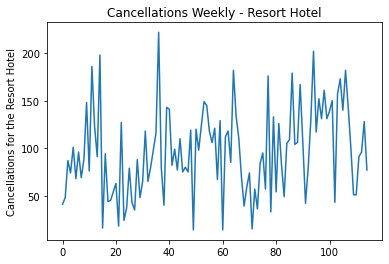

In [15]:
plt.plot(newdf['is_canceled'])
plt.ylabel('Cancellations for the Resort Hotel')
plt.title("Cancellations Weekly - Resort Hotel")
plt.show()

In [16]:
dfc = df[df['hotel']=='City Hotel']

In [17]:
dfc.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


In [18]:
sortedval=dfc.sort_values(['arrival_date_year','arrival_date_week_number'], ascending=True)
sortdf=pd.DataFrame(sortedval)
sortdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,No Deposit,6.0,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-03
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-07-01
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,No Deposit,9.0,NaN,0,Transient,68.0,0,1,Canceled,2015-04-30
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,2,Canceled,2015-06-23
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,No Deposit,9.0,NaN,0,Transient,76.5,0,1,Canceled,2015-04-02


In [19]:
reqcolc = pd.DataFrame(sortdf, columns= ['arrival_date_year','arrival_date_week_number','is_canceled'])

In [20]:
reqcolc.head()

,arrival_date_year,arrival_date_week_number,is_canceled
40060,2015,27,0
40061,2015,27,1
40062,2015,27,1
40063,2015,27,1
40064,2015,27,1


In [21]:
reqcolc['mergedweek'] = reqcolc['arrival_date_year'].map(str) + reqcolc['arrival_date_week_number'].map(str)

In [22]:
reqcolc.head(10)

,arrival_date_year,arrival_date_week_number,is_canceled,mergedweek
40060,2015,27,0,201527
40061,2015,27,1,201527
40062,2015,27,1,201527
40063,2015,27,1,201527
40064,2015,27,1,201527
40065,2015,27,1,201527
40066,2015,27,0,201527
40067,2015,27,1,201527
40068,2015,27,1,201527
40069,2015,27,1,201527


In [23]:
reqcolc.groupby('mergedweek')['is_canceled'].value_counts()

mergedweek  is_canceled
201527      1               97
            0               85
201528      1              153
            0               61
201529      1              228
                          ... 
20177       1              295
20178       0              486
            1              277
20179       0              452
            1              301
Name: is_canceled, Length: 230, dtype: int64

In [24]:
 newdfc = reqcolc.groupby('mergedweek')['is_canceled'].sum().reset_index() #df.groupby(['Fruit','Name'])['Number'].sum().reset_index()

In [25]:
newdfc.head()

,mergedweek,is_canceled
0,201527,97
1,201528,153
2,201529,228
3,201530,321
4,201531,159


<h2>Analysis on the City Hotel<h2>

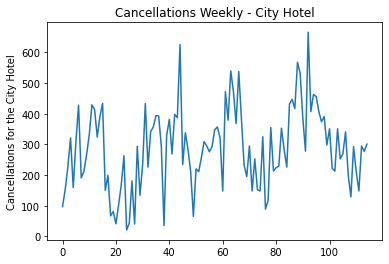

In [26]:
plt.plot(newdfc['is_canceled'])
plt.ylabel('Cancellations for the City Hotel')
plt.title("Cancellations Weekly - City Hotel")
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original Time Series')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Mean and Standard Deviation')
    plt.show(block=False)
    
    

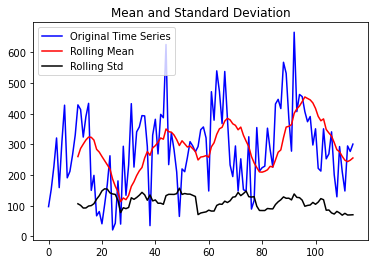

In [28]:
test_stationarity(newdfc['is_canceled'])

In [29]:
def dickey_fuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No of Lags','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [30]:
dickey_fuller(newdfc['is_canceled'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.168526
p-value                          0.021880
No of Lags                       2.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


Test Statistic is smaller than the 5% critical values 
So we can say with 95% confidence that this is stationary series.

In [31]:
#Weighted Exponential Moving Average

In [32]:
#newdfc.set_index('mergedweek', inplace=True)
#newdfc.set_index('week', inplace=True)

#log transformation

In [33]:
logged = newdfc.copy()

In [34]:
logged['log']= np.log(newdfc['is_canceled'])

In [35]:
logged.head()

,mergedweek,is_canceled,log
0,201527,97,4.574711
1,201528,153,5.030438
2,201529,228,5.429346
3,201530,321,5.771441
4,201531,159,5.068904


In [36]:
#def getyear(x):
#    return str(x[:4])

In [37]:
#logged['year'] = logged.mergedweek.map(getyear)
#df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [38]:
logged.head()

,mergedweek,is_canceled,log
0,201527,97,4.574711
1,201528,153,5.030438
2,201529,228,5.429346
3,201530,321,5.771441
4,201531,159,5.068904


In [39]:
logged.head()

,mergedweek,is_canceled,log
0,201527,97,4.574711
1,201528,153,5.030438
2,201529,228,5.429346
3,201530,321,5.771441
4,201531,159,5.068904


In [40]:
logged = logged['log']

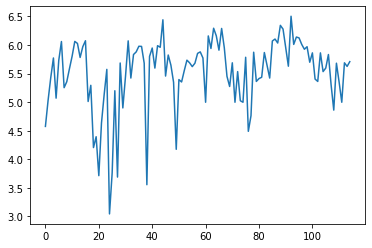

In [41]:
plt.plot(logged)

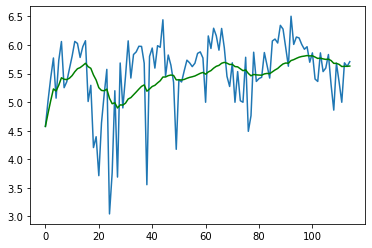

In [42]:
exponentialweighted = logged.ewm(halflife=12).mean()
plt.plot(logged)
plt.plot(exponentialweighted, color='green')

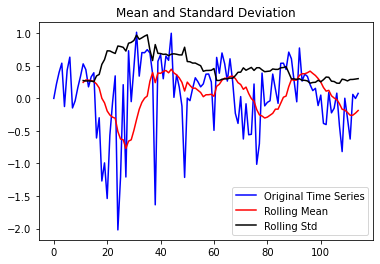

In [43]:
timeseriesdiff = logged - exponentialweighted
test_stationarity(timeseriesdiff)

In [44]:
dickey_fuller(timeseriesdiff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.562469
p-value                          0.006520
No of Lags                      11.000000
Number of Observations Used    103.000000
Critical Value (1%)             -3.495493
Critical Value (5%)             -2.890037
Critical Value (10%)            -2.581971
dtype: float64


Test Statistic is smaller than the 5% critical values So we can say with 95% confidence that this is stationary series.

In [45]:
timeseriesdiff.head(10)

0    0.000000
1    0.221284
2    0.401412
3    0.541229
4   -0.125216
5    0.433273
6    0.633652
7   -0.146928
8   -0.036715
9    0.165866
Name: log, dtype: float64

In [46]:
#Differencing

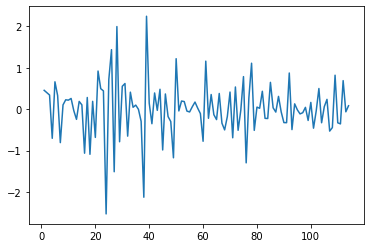

In [47]:
tsdiff = logged - logged.shift()
plt.plot(tsdiff)

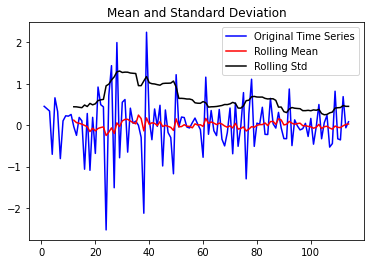

In [48]:
test_stationarity(tsdiff)

In [49]:
tsdiff.dropna(inplace=True)
dickey_fuller(tsdiff)

Results of Dickey-Fuller Test:
Test Statistic                -1.260662e+01
p-value                        1.690354e-23
No of Lags                     1.000000e+00
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64


In [50]:
#Dickey fuller test statistic is less than 1% critical value. Hence the time series is stationary with the confidence of 99%

In [51]:
#using differencing 

In [52]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [53]:
acfplot = acf(tsdiff, nlags=5)
pacfplot = pacf(tsdiff, nlags=5, method='ols')

C:\Users\Sneha Jayaraman\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [54]:
print(acfplot)

[ 1.         -0.44342667 -0.06579256  0.15043063 -0.10118629  0.0456857 ]


Text(0.5, 1.0, 'Autocorrelation Function')

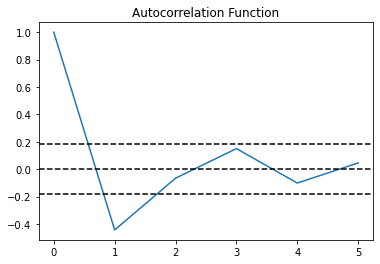

In [55]:
#Plot ACF: 
plt.plot(acfplot)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(tsdiff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(tsdiff)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

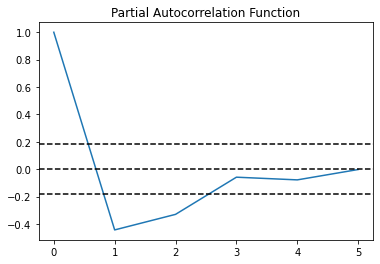

In [56]:
#Plot PACF: 
plt.plot(pacfplot)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(tsdiff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(tsdiff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')

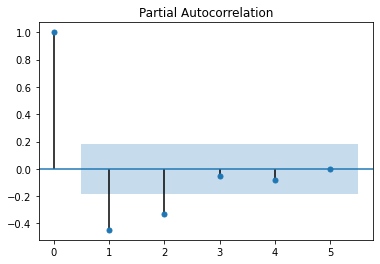

In [57]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(tsdiff.squeeze(), lags=5)
plt.show()

In [58]:
# shows AR: p = 2

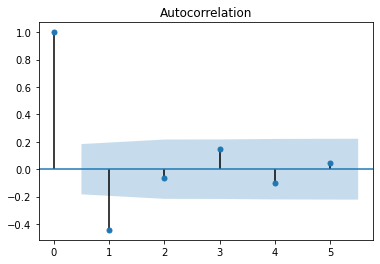

In [59]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(tsdiff.squeeze(), lags=5)
plt.show()

In [60]:
#shows MA: q = 1

<h2>AR, MA, ARIMA Models<h2>

In [61]:
from statsmodels.tsa.arima_model import ARIMA

In [62]:
#AR Model

Text(0.5, 1.0, 'RSS: 36.2378')

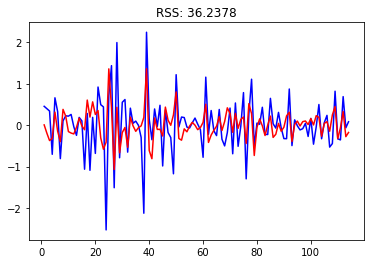

In [63]:
ar = ARIMA(logged, order=(2, 1, 0))  
armodel = ar.fit()  
plt.plot(tsdiff, color = 'blue')
plt.plot(armodel.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((armodel.fittedvalues-tsdiff)**2))

In [64]:
#MA Model

Text(0.5, 1.0, 'RSS: 36.2599')

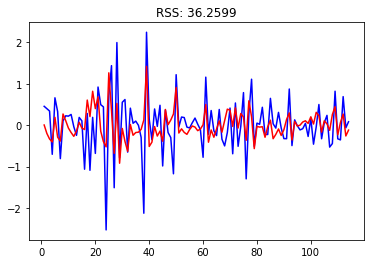

In [65]:
ma = ARIMA(logged, order=(0, 1, 1))  
mamodel = ma.fit()  
plt.plot(tsdiff, color = 'blue')
plt.plot(mamodel.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((mamodel.fittedvalues-tsdiff)**2))

Text(0.5, 1.0, 'RSS: 36.0226')

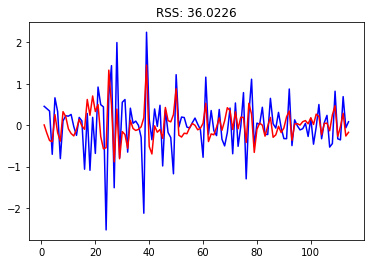

In [66]:
arima = ARIMA(logged, order=(2, 1, 1))  
arimamodel = arima.fit()  
plt.plot(tsdiff, color = 'blue')
plt.plot(arimamodel.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((arimamodel.fittedvalues-tsdiff)**2))

In [67]:
# Combined RSS is better than RSS for AR or MA alone

In [68]:
differencedPred = pd.Series(arimamodel.fittedvalues, copy=True)
differencedPred.head()

1    0.006157
2   -0.193687
3   -0.370633
4   -0.396901
5    0.255782
dtype: float64

In [69]:
#Shows a lag of 1

In [70]:
undodiff = differencedPred.cumsum()
undodiff.head()

1    0.006157
2   -0.187530
3   -0.558163
4   -0.955064
5   -0.699282
dtype: float64

In [71]:
addbase = pd.Series(logged.iloc[0], index=logged.index)
predictions = addbase.add(undodiff,fill_value=0)
predictions.head()

0    4.574711
1    4.580868
2    4.387181
3    4.016548
4    3.619647
dtype: float64

In [72]:
predARIMA = np.exp(predictions)

In [73]:
predARIMA.head()

0    97.000000
1    97.599075
2    80.413381
3    55.509156
4    37.324394
dtype: float64

In [74]:
newdfc['is_canceled'].head()

0     97
1    153
2    228
3    321
4    159
Name: is_canceled, dtype: int64

In [75]:
cmp = pd.DataFrame(predARIMA - newdf['is_canceled'])

In [76]:
cmp

,0
0,56.000000
1,49.599075
2,-6.586619
3,-18.490844
4,-63.675606
...,...
110,138.387436
111,91.961902
112,147.643608
113,59.714433


Text(0.5, 1.0, 'RMSE: 252.1623')

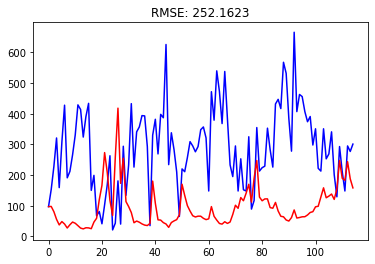

In [77]:
plt.plot(newdfc['is_canceled'] , color = 'blue')
plt.plot(predARIMA, color= 'red')
plt.title('RMSE: %.4f'% np.sqrt(sum((predARIMA-newdfc['is_canceled'])**2)/len(newdfc['is_canceled'])))

In [78]:
dfr = df[df['hotel']=='Resort Hotel']

In [79]:
dfr.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [80]:
sortedval=dfr.sort_values(['arrival_date_year','arrival_date_week_number'], ascending=True)
sortdf=pd.DataFrame(sortedval)
sortdf.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [81]:
reqcolc = pd.DataFrame(sortdf, columns= ['arrival_date_year','arrival_date_week_number','is_canceled'])

In [82]:
reqcolc.head()

,arrival_date_year,arrival_date_week_number,is_canceled
0,2015,27,0
1,2015,27,0
2,2015,27,0
3,2015,27,0
4,2015,27,0


In [83]:
reqcolc['mergedweek'] = reqcolc['arrival_date_year'].map(str) + reqcolc['arrival_date_week_number'].map(str)

In [84]:
reqcolc.head(10)

,arrival_date_year,arrival_date_week_number,is_canceled,mergedweek
0,2015,27,0,201527
1,2015,27,0,201527
2,2015,27,0,201527
3,2015,27,0,201527
4,2015,27,0,201527
5,2015,27,0,201527
6,2015,27,0,201527
7,2015,27,0,201527
8,2015,27,1,201527
9,2015,27,1,201527


In [85]:
reqcolc.groupby('mergedweek')['is_canceled'].value_counts()

mergedweek  is_canceled
201527      0              136
            1               41
201528      0              223
            1               48
201529      0              254
                          ... 
20177       1               96
20178       0              332
            1              128
20179       0              291
            1               77
Name: is_canceled, Length: 230, dtype: int64

In [86]:
 newdfr = reqcolc.groupby('mergedweek')['is_canceled'].sum().reset_index() #df.groupby(['Fruit','Name'])['Number'].sum().reset_index()

In [87]:
newdfr.head()

,mergedweek,is_canceled
0,201527,41
1,201528,48
2,201529,87
3,201530,74
4,201531,101


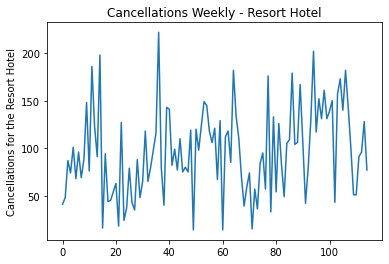

In [88]:
plt.plot(newdfr['is_canceled'])
plt.ylabel('Cancellations for the Resort Hotel')
plt.title("Cancellations Weekly - Resort Hotel")
plt.show()

In [89]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
  

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original Time Series')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Mean and Standard Deviation')
    plt.show(block=False)
    
    

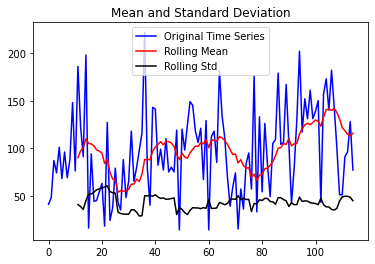

In [90]:
test_stationarity(newdfr['is_canceled'])

In [91]:
def dickey_fuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No of Lags','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [92]:
dickey_fuller(newdfr['is_canceled'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.039991
p-value                          0.001215
No of Lags                       2.000000
Number of Observations Used    112.000000
Critical Value (1%)             -3.490131
Critical Value (5%)             -2.887712
Critical Value (10%)            -2.580730
dtype: float64


Test Statistic is smaller than the 1% critical values 
So we can say with 99% confidence that this is stationary series.

In [93]:
logged = newdfr.copy()

In [94]:
logged['log']= np.log(newdfr['is_canceled'])

In [95]:
logged.head()

,mergedweek,is_canceled,log
0,201527,41,3.713572
1,201528,48,3.871201
2,201529,87,4.465908
3,201530,74,4.304065
4,201531,101,4.615121


In [96]:
#def getyear(x):
#    return str(x[:4])

In [97]:
#logged['year'] = logged.mergedweek.map(getyear)
#df['Datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'])


In [98]:
logged = logged['log']

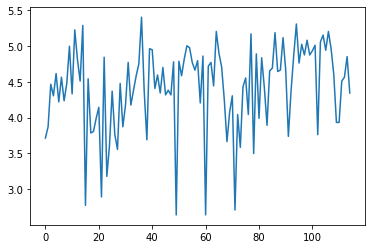

In [99]:
plt.plot(logged)

In [100]:
#Differencing

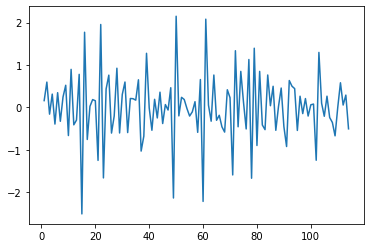

In [101]:
tsdiff = logged - logged.shift()
plt.plot(tsdiff)

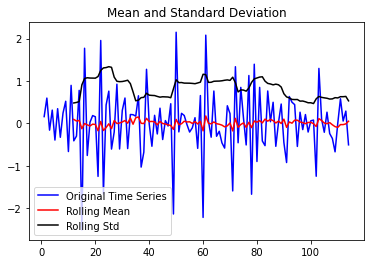

In [102]:
test_stationarity(tsdiff)

In [103]:
tsdiff.dropna(inplace=True)
dickey_fuller(tsdiff)

Results of Dickey-Fuller Test:
Test Statistic                  -3.802532
p-value                          0.002882
No of Lags                      11.000000
Number of Observations Used    102.000000
Critical Value (1%)             -3.496149
Critical Value (5%)             -2.890321
Critical Value (10%)            -2.582122
dtype: float64


In [104]:
#Dickey fuller test statistic is less than 5% critical value. Hence the time series is stationary with the confidence of 95%

In [105]:
#using differencing 

In [106]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [107]:
acfplot = acf(tsdiff, nlags=5)
pacfplot = pacf(tsdiff, nlags=5, method='ols')

C:\Users\Sneha Jayaraman\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [108]:
print(acfplot)

[ 1.         -0.60909022  0.15755537  0.04830338 -0.14152525  0.09037956]


Text(0.5, 1.0, 'Autocorrelation Function')

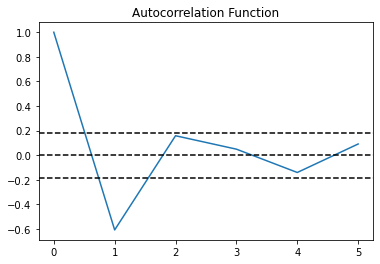

In [109]:
#Plot ACF: 
plt.plot(acfplot)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(tsdiff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(tsdiff)),linestyle='--',color='black')
plt.title('Autocorrelation Function')

Text(0.5, 1.0, 'Partial Autocorrelation Function')

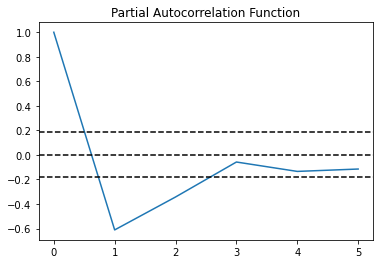

In [110]:
#Plot PACF: 
plt.plot(pacfplot)
plt.axhline(y=0,linestyle='--',color='black')
plt.axhline(y=-1.96/np.sqrt(len(tsdiff)),linestyle='--',color='black')
plt.axhline(y=1.96/np.sqrt(len(tsdiff)),linestyle='--',color='black')
plt.title('Partial Autocorrelation Function')

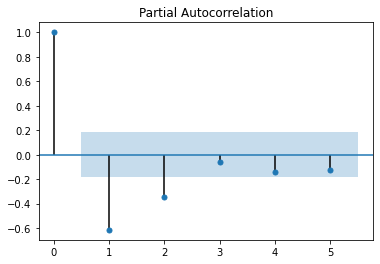

In [111]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(tsdiff.squeeze(), lags=5)
plt.show()

In [112]:
# shows AR: p = 2

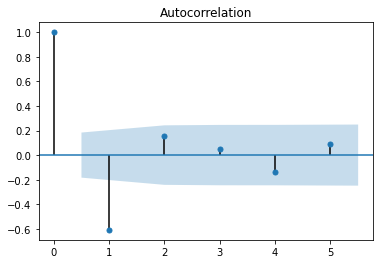

In [113]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(tsdiff.squeeze(), lags=5)
plt.show()

In [114]:
#shows MA: q = 1

In [115]:
from statsmodels.tsa.arima_model import ARIMA

In [116]:
#AR Model

Text(0.5, 1.0, 'RSS: 40.0707')

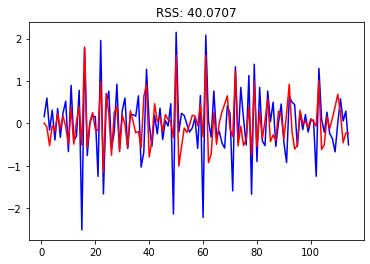

In [117]:
ar = ARIMA(logged, order=(2, 1, 0))  
armodel = ar.fit()  
plt.plot(tsdiff, color = 'blue')
plt.plot(armodel.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((armodel.fittedvalues-tsdiff)**2))

In [118]:
#MA Model

Text(0.5, 1.0, 'RSS: 38.9264')

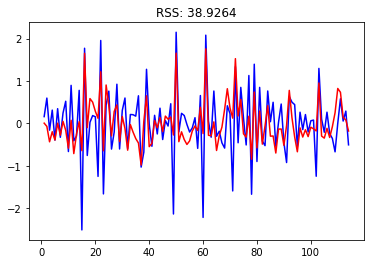

In [119]:
ma = ARIMA(logged, order=(0, 1, 1))  
mamodel = ma.fit()  
plt.plot(tsdiff, color = 'blue')
plt.plot(mamodel.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((mamodel.fittedvalues-tsdiff)**2))

Text(0.5, 1.0, 'RSS: 36.1827')

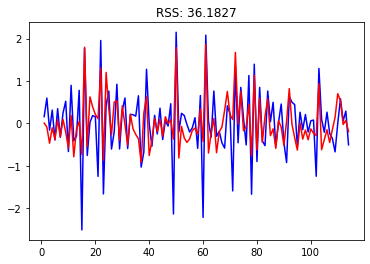

In [120]:
arima = ARIMA(logged, order=(2, 1, 1))  
arimamodel = arima.fit()  
plt.plot(tsdiff, color = 'blue')
plt.plot(arimamodel.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((arimamodel.fittedvalues-tsdiff)**2))

In [121]:
# Combined RSS is better than RSS for AR or MA alone

In [122]:
differencedPred = pd.Series(arimamodel.fittedvalues, copy=True)
differencedPred.head()

1    0.004374
2   -0.088923
3   -0.469838
4   -0.105753
5   -0.379778
dtype: float64

In [123]:
#Shows a lag of 1

In [124]:
undodiff = differencedPred.cumsum()
undodiff.head()

1    0.004374
2   -0.084549
3   -0.554387
4   -0.660139
5   -1.039917
dtype: float64

In [125]:
addbase = pd.Series(logged.iloc[0], index=logged.index)
predictions = addbase.add(undodiff,fill_value=0)
predictions.head()

0    3.713572
1    3.717946
2    3.629023
3    3.159186
4    3.053433
dtype: float64

In [126]:
predARIMA = np.exp(predictions)

In [127]:
predARIMA.head()

0    41.000000
1    41.179720
2    37.675993
3    23.551406
4    21.187956
dtype: float64

In [128]:
newdfr['is_canceled'].head()

0     41
1     48
2     87
3     74
4    101
Name: is_canceled, dtype: int64

In [129]:
cmp = pd.DataFrame(predARIMA - newdf['is_canceled'])

In [130]:
cmp

,0
0,7.105427e-15
1,-6.820280e+00
2,-4.932401e+01
3,-5.044859e+01
4,-7.981204e+01
...,...
110,-2.163350e+01
111,-4.116993e+01
112,-4.758517e+01
113,-7.622808e+01


Text(0.5, 1.0, 'RMSE: 150.6055')

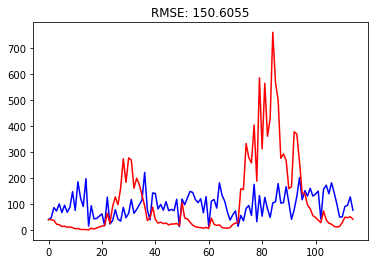

In [131]:
plt.plot(newdfr['is_canceled'] , color = 'blue')
plt.plot(predARIMA, color= 'red')
plt.title('RMSE: %.4f'% np.sqrt(sum((predARIMA-newdfr['is_canceled'])**2)/len(newdfc['is_canceled'])))